# SymPy Basics

- sympy.org
- Jupyter basics
- init_printing
- printing expressions
- defining variables
- assumptions
- creating expressions
- differentiation
- integrating (indef, def)
- solve
- subs
- evalf
- units
- lambdify

You can learn much more in the SymPy tutorial: http://docs.sympy.org/latest/tutorial/

The following imports all top level functions, variables, classes available in [SymPy](http://www.sympy.org).

In [1]:
from sympy import *

`init_printing()` is a function that enables pretty mathmatical renderings of the symbols and expressions.

In [2]:
init_printing()

You can create symbols to work with using the `symbols()` function.

In [3]:
a, b, c, o = symbols('a, b, c, omega_n')

To display symbols and expressions, type the variable name and press `shift + enter`.

In [4]:
a, b, c, o

You can create functions like so with the `Function` class.

In [5]:
f = Function('f')(a)

In [6]:
f

The `diff()` function takes derivatives with respect to any variable.

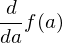

In [7]:
diff(f, a)

Expressions are created by using math opeators and functions. Note that `**` is exponentiation in Python.

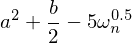

In [8]:
expr = a**2 + b / 2 - 5 * o**(1/2)
expr

Partial derivatives are easy with:

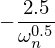

In [9]:
diff(expr, o)

Indefinite integrals can also be computed:

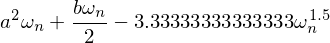

In [10]:
integrate(expr, o)

SymPy assumes that all variables are complex by default. You may want to ensure that variables are real to make sure some of the special functions work as expected.

In [11]:
v = symbols('v', real=True)

You can also add other assumptions to the variables. Some of these will ensure that basic simplifications occur.

In [12]:
v = symbols('v')
sqrt(v**v)

In [13]:
v = symbols('v', positive=True)
sqrt(v**2)

# Solving Systems of Equations

This is how you define a function in Python. Note that indentation of 4 spaces matters! We will use this function to print equations.

In [14]:
def print_eq(sym, expr):
    return Eq(sympify(sym), expr)

This system of two algebraic equations with the unknowns $R_1$ and $R_2$ (from beam problem in notes) can be solved easily with SymPy:

In [15]:
R1, R2, F, w, l, a, c, d, M = symbols('R1, R2, F, w, l, a, c, d, M')

In [16]:
shear_expr = R1 - F - w * (l - c) + w * (l - d) + R2
print_eq(0, shear_expr)

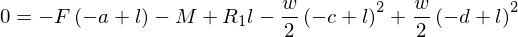

In [17]:
moment_expr = R1 * l - F * (l - a) - M - w / 2 * (l - c)**2 + w / 2 * (l - d)**2
print_eq(0, moment_expr)

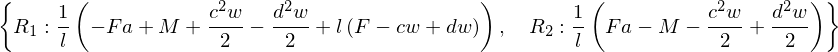

In [18]:
solve([shear_expr, moment_expr], R1, R2)

After you do all your symbolic algebra you may want to substitute in numerical values. You do so by passing in a dictionary of variable to number mappings.

In [19]:
expr = a + b**2
expr

In [20]:
expr.subs({a: 12.4, b: 5})

Sometimes you may need to use `evalf()` to force numerical evaluations.

In [21]:
expr = pi * sqrt(a) + b
expr.subs({a: 12.4, b: 5})

In [22]:
expr.subs({a: 12.4, b: 5}).evalf()

You can also make use of units so that conversions automatically happen. SymPy currently does not support US Customary Units.

In [23]:
from sympy.physics.units import *

In [24]:
l1 = 10 * meter
l2 = 20 * centi * meter

In [25]:
(l1 + l2).evalf()

# Exercise

Draw a free body diagram for this problem then write the necessary equations and solve the problem using SymPy.

![](fbd.jpg)



# Exercise

Draw a free body diagram for this problem then write the necessary equations and solve the problem using SymPy.

![](internal-load.jpg)